In [144]:
#Importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

In [146]:
df = pd.read_csv("income.csv") # readig the data from the csv
df.head() # will show the first five rows of the DataFrame

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


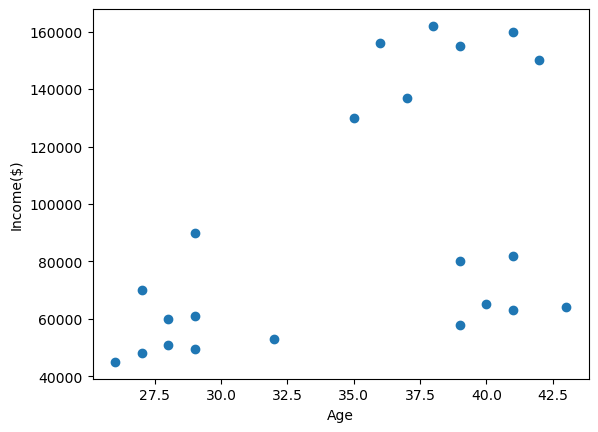

In [148]:
# here whe are scatter plottig the data of age and income
plt.scatter(df["Age"] , df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.show()

In [158]:
# from sklearn.cluster the KMeans function is used to find the KMean from the data
km = KMeans(n_clusters = 3) # n_clusters are the number of cluster you want to use we have hard coded the clusters for
km # km is the KMeans variable

KMeans(n_clusters=3)

In [160]:
y_predicted = km.fit_predict(df[["Age" , "Income($)"]]) # we have fit_predict in the one single step
y_predicted # this prediction will predict an array of KMeans

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [162]:
df["cluster"] = y_predicted # adding an aditional column of name cluster

In [164]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


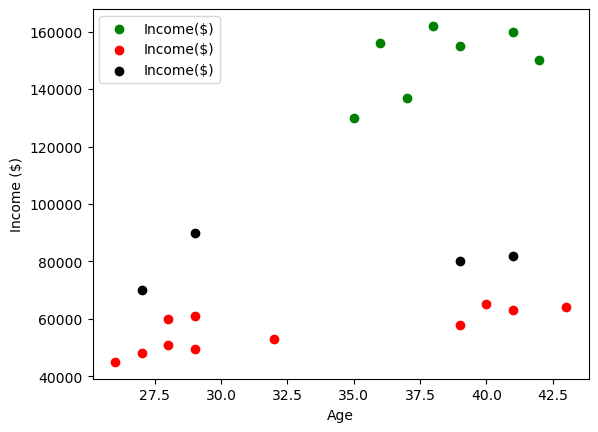

In [168]:
# creating the different DataFrames for scatter plots to show the different clusters
df1 = df[df["cluster"] == 0]
df2 = df[df["cluster"] == 1]
df3 = df[df["cluster"] == 2]

# plotting the scatter plots of Age vs Income($)
plt.scatter(df1["Age"] , df1["Income($)"] , color = "green" , label = "Income($)")
plt.scatter(df2["Age"] , df2["Income($)"] , color = "red" , label = "Income($)")
plt.scatter(df3["Age"] , df3["Income($)"] , color = "black" , label = "Income($)")

# setting the lables
plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.legend()

In [170]:
# the above scatter plot is not ok as some clusters are not working properly
#so we will preprocess the data using MinMaxScaller so that all the values will faal in range 0 to 1
scaler = MinMaxScaler()
df["Income($)"] = scaler.fit_transform(df[["Income($)"]]) # the fit_transform method is used to fit and trasform in a single step
df["Age"] = scaler.fit_transform(df[["Age"]])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [172]:
#creating another model
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [174]:
# predicting the features
y_predicted = km.fit_predict(df[["Age" , "Income($)"]])
y_predicted

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [176]:
# setting the cluster column
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [178]:
# cluster_centers_ will give us the mid pointers of all the clusters
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

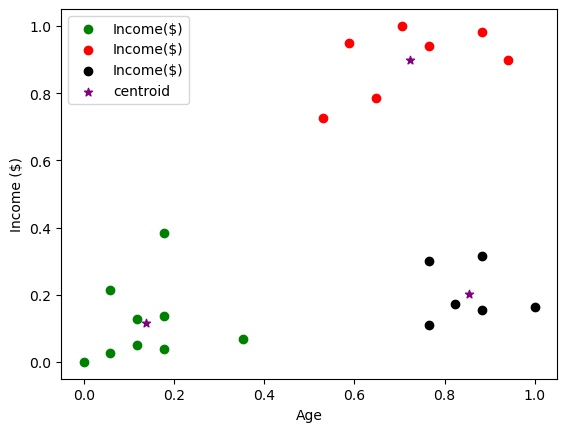

In [180]:
# again creating the scatters plots
df1 = df[df["cluster"] == 0]
df2 = df[df["cluster"] == 1]
df3 = df[df["cluster"] == 2]

# now out scatter plots will show fine as MixMaxScaller is used on the data 
plt.scatter(df1["Age"] , df1["Income($)"] , color = "green" , label = "Income($)")
plt.scatter(df2["Age"] , df2["Income($)"] , color = "red", label = "Income($)")
plt.scatter(df3["Age"] , df3["Income($)"] , color = "black", label = "Income($)")

# we will also plot the centroid on the plot
plt.scatter(km.cluster_centers_[:,0] , km.cluster_centers_[:,1] , color = "purple" , marker =  "*" , label = "centroid")
plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.legend()

In [208]:
# this process is used to determine the optimal numer of clusters
k_rng = range(1,10) # first giving some random range
sse = [] # declaring an empty array sse is sum of squared error 
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[["Age" , "Income($)"]])
    sse.append(km.inertia_) # km.inertia_ is used to find the sse

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [210]:
# checking the sum of squared values 
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.368773407644059,
 0.31055970728951543,
 0.24721337411907612,
 0.19522674746719498,
 0.15822064614134235,
 0.123372111217023]

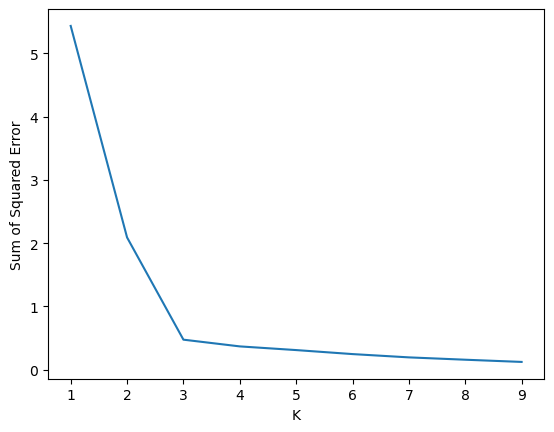

In [212]:
# this method is also called the elbow method so  that using the elbow method you can
# find how many number of clusters you need
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng,sse)